# Lab 1.1 - Cleaning and Analyzing Warehouse Data

## Objective
1. Import a CSV dataset using `pandas`
2. Clean the dataset using multiple techniques
3. Answer questions about using the data. 

*Use the challenge dataset to practice cleaning with regex.*

## Rubric

- 6 pts - Contains all required components and uses professional language
- 5 pts - Contains all required components, but uses unprofessional language, formating, etc. 
- 4 pts - Contains some, but not all, of the required components
- 3 pts - Did not submit

## Pandas reference

In addtion to the methods you learned last lab, you may need the following: 

- `df.dtypes` - the data types of the each column
- `df.columns` - the name of each column
- `df.shape` - the number of rows and columns of the dataset
- `df.dropna()` - removes null values
- `df.isnull()` - returns a dataframe with true/false values based on if the value is null. Can be used in conjuction with `.sum()`
- `pd.todatetime(...)` - sets a given column to a `datetime` object
- `df.column.isunique` - returns True if all data are unique
- `df.column.unique()` - returns all of the uniue values of a column
- `df['col'].replace(...,...)` - replaces values in a column with another value
- `df['col'].value_counts()` - returns the value counts of each unique value
- `df['col'].quantile(0.25)` or `.quartile(0.75) ` - returns the value at 25% or 75% precent    

## Preparing Data

In this section, we will import and prepare our data to be manipulated

Import `pandas` and `matplotlib.pyplot` here.

In [444]:
import pandas as pd
import matplotlib.pyplot as plt

Use `pandas`' `read_csv()` to create a Dataframe called `warehouse`.

In [445]:
df = pd.read_csv("warehouse_data_challenge.csv")
display(df)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD475510,ID0247417082,2019-08-07,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 2)]",386776,59.70,-37.817662,144.970405,10,20174.70,Winter,True,0.1282,i bought this phone to send to my sister in .....,False
496,ORD086060,ID0130015098,03-28-2019,Nickolson,"[('pearTV', 2), ('Candle Inferno', 2), ('Toshi...",22120,62.29,-37.815469,144.968083,0,22182.29,Autumn,True,0.3711,one star it was the wrong phone,False
497,ORD079320,ID2707985442,2019-10-16,Nickolson,"[('pearTV', 1), ('Alcon 10', 1), ('Lucent 330S...",16490,106.98,-37.805979,144.966101,0,16596.98,Spring,True,1.4368,love this phone! has many great features!,True
498,ORD026546,ID0060088412,2019-05-19,Nickolson,"[('iStream', 1), ('Candle Inferno', 1), ('iAss...",5030,79.89,37.820071,144.984435,10,4606.89,Autumn,True,1.3191,spoiled son's birthday present son wanted one ...,True


Display the first 5 rows of `warehouse`.

In [446]:
df.head(5)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


Display the column names of the Dataframe. 

In [471]:
print(list(df.columns))

['order_id', 'customer_id', 'date', 'nearest_warehouse', 'shopping_cart', 'order_price', 'delivery_charges', 'customer_lat', 'customer_long', 'coupon_discount', 'order_total', 'season', 'is_expedited_delivery', 'distance_to_nearest_warehouse', 'latest_customer_review', 'is_happy_customer']


How many data points are in our table?

In [448]:
print(f"There are {len(df)} data points in the table")

There are 500 data points in the table


We can use one command to answer these three questions: 
- What is the average coupon discount?
- What is the largest order price?
- What is the smallest distance to warehouse?

In [469]:
df.describe()

,date,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,473,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000
mean,2019-06-27 05:07:29.048625664,26018.071882,76.652241,-35.722552,144.969348,11.067653,12165.605285,2.264284
min,2019-01-02 00:00:00,585.000000,46.350000,-37.827123,144.924967,0.000000,639.290000,0.107800
25%,2019-03-29 00:00:00,6910.000000,65.900000,-37.818310,144.953284,5.000000,6218.310000,0.743800
50%,2019-06-25 00:00:00,12755.000000,76.330000,-37.812502,144.965790,10.000000,10808.970000,1.029900
75%,2019-09-25 00:00:00,20360.000000,82.780000,-37.805432,144.983824,15.000000,17638.330000,1.408700
max,2019-12-31 00:00:00,947691.000000,114.040000,37.826339,145.019837,25.000000,33947.060000,94.973400
std,NaN,88710.977012,14.557913,12.375605,0.022574,8.621740,7284.617537,9.056696


## Cleaning Data

**Data cleaning** is the process of removing errors and inaccuracies from data to make it ready for analysis In these next steps, we will explore and clean our dataset. 


Check the dataset for null(or empty) values. How many null values are there and in which columns?

In [ ]:
# displaying the totals of each column's null values
print(df.isnull().sum())

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           8
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           1
is_happy_customer                0
dtype: int64


So `season` and `latest_customer_review` have missing values. Drop the rows with missing values. You should have 491 rows remaining.

In [450]:
# removing the null rows and altering the data frame without those rows
df.dropna(inplace=True)
display(df)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD475510,ID0247417082,2019-08-07,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 2)]",386776,59.70,-37.817662,144.970405,10,20174.70,Winter,True,0.1282,i bought this phone to send to my sister in .....,False
496,ORD086060,ID0130015098,03-28-2019,Nickolson,"[('pearTV', 2), ('Candle Inferno', 2), ('Toshi...",22120,62.29,-37.815469,144.968083,0,22182.29,Autumn,True,0.3711,one star it was the wrong phone,False
497,ORD079320,ID2707985442,2019-10-16,Nickolson,"[('pearTV', 1), ('Alcon 10', 1), ('Lucent 330S...",16490,106.98,-37.805979,144.966101,0,16596.98,Spring,True,1.4368,love this phone! has many great features!,True
498,ORD026546,ID0060088412,2019-05-19,Nickolson,"[('iStream', 1), ('Candle Inferno', 1), ('iAss...",5030,79.89,37.820071,144.984435,10,4606.89,Autumn,True,1.3191,spoiled son's birthday present son wanted one ...,True


Now let's take a look at the data types of each column and see if they make sense.

In [451]:
# checking column types
df.dtypes

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                        int64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                      float64
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                   bool
dtype: object

Data type of date column is object instead of datetime. So fix this problem and check the datatypes again.

In [452]:
# overwriting the date column with the formated dates
df["date"] = pd.to_datetime(df["date"], format="mixed")

# checking column types
df.dtypes

order_id                                 object
customer_id                              object
date                             datetime64[ns]
nearest_warehouse                        object
shopping_cart                            object
order_price                               int64
delivery_charges                        float64
customer_lat                            float64
customer_long                           float64
coupon_discount                           int64
order_total                             float64
season                                   object
is_expedited_delivery                      bool
distance_to_nearest_warehouse           float64
latest_customer_review                   object
is_happy_customer                          bool
dtype: object

Now let's check for errors. 

First, let's make sure that our data in `order_id` is unique and we don't have any duplicates. 

In [453]:
df["order_id"].is_unique

True

Now, let's check what the unique values of `nearest_warehouse` are.

In [454]:
print(list(df["nearest_warehouse"].unique()))

['Thompson', 'Nickolson', 'Bakers', 'nickolson', 'thompson']


Thompson and thompson should be the same, but here they are being counted as different warehouse. Similarly Nickolson and nickolson are same. Change all of the lowercase names to Title case. 

In [455]:
df["nearest_warehouse"] = df["nearest_warehouse"].str.title()
warehouses = list(df["nearest_warehouse"].unique())
print(warehouses)

['Thompson', 'Nickolson', 'Bakers']


Check the amount of times each `nearest_warehouse` is said.

In [456]:
for warehouse in warehouses: 
    print(f"The amount of \"{warehouse}\" warehouses is: {df["nearest_warehouse"].value_counts().get(warehouse, 0)}")

The amount of "Thompson" warehouses is: 192
The amount of "Nickolson" warehouses is: 183
The amount of "Bakers" warehouses is: 116


The value counts should be Thompson: 192, Nickolson: 183, Bakers: 116

Check the counts and unique values of `is_happy_customer`.

In [457]:
happyness = list(df["is_happy_customer"].unique())
for emotion in happyness:
    print(f"The amount of {"dissatisfied" if emotion == True else "satisfied"} customers is {df["is_happy_customer"].value_counts().get(emotion, 0)}")

The amount of dissatisfied customers is 352
The amount of satisfied customers is 139


Create a table with `order_price`, `delivery_charges`, `coupon_discount`, and `order_total`. Look at the first 10 rows. Is the `order_total` column correct?

In [458]:
pd.options.mode.copy_on_write = True
df10 = df.head(10)
df10["true_total"] = df['order_price'] + df["delivery_charges"] - df["coupon_discount"]
print(df10["true_total"] == df10["order_total"])
display(df10)

0     False
1      True
2     False
3     False
4     False
5     False
6     False
9     False
10     True
11    False
dtype: bool


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,true_total
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True,12269.89
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False,9142.71
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True,10725.87
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False,24842.61
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True,9195.54
5,ORD146760,ID0311654900,2019-09-16,Bakers,"[('Thunder line', 2), ('Universe Note', 1)]",7810,71.22,37.820245,145.014944,10,7100.22,Spring,False,2.0752,stolen phone sold us a stolen phone so we coul...,False,7871.22
6,ORD337984,ID3394768956,2019-09-14,Thompson,"[('Candle Inferno', 1), ('Alcon 10', 1), ('Tos...",13700,74.84,-37.807743,144.951570,5,13089.84,Spring,False,0.6767,"love our inferno stick,easy to set up and have...",True,13769.84
9,ORD462194,ID5301568579,2019-03-21,Thompson,"[('Universe Note', 1), ('Lucent 330S', 1), ('T...",13320,62.26,-37.808675,144.942337,15,11384.26,winter,True,0.6093,does not live up to its reputation. customer s...,False,13367.26
10,ORD034800,ID4283908179,2019-08-03,Bakers,"[('Alcon 10', 2), ('pearTV', 2), ('iStream', 1...",31895,78.25,-37.811334,145.008678,0,31973.25,Winter,True,1.1919,i love this phone it is so user friendly and t...,True,31973.25
11,ORD361636,ID0589500304,2019-12-05,Nickolson,"[('Lucent 330S', 1), ('pearTV', 2)]",13850,77.29,-37.820228,144.957411,25,10464.79,Summer,False,1.0829,great phone great deal! phone in fantastic con...,True,13902.29


### Remove Outliers

We are going to remove statistical outliers in `order_total`. To remove outliers, follow this process:

- Find upper and lower quartiles
- Find IQR range
- Find upper and lower limit
- Remove elements 

In [459]:
quarters = df.order_total.quantile([0.25, 0.75])

In [460]:
quarters = list(df.order_total.quantile([0.25, 0.75]))
upper_quarter = quarters[1]
lower_quarter = quarters[0]
IQR = upper_quarter - lower_quarter
print(f"{round(IQR, 2)}")

11795.82


In [461]:
min = df.order_total.min()
max = df.order_total.max()
print(f"The lower limit is {min}", f"The Upper limit is {max}", sep="\n")

The lower limit is 639.29
The Upper limit is 5688269.6


In [462]:
dropped_outliers = df[(df["order_total"] < lower_quarter - 1.5 * IQR) | (df["order_total"] > upper_quarter + 1.5 * IQR)].index
df.drop(dropped_outliers, inplace=True)
display(df)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD475510,ID0247417082,2019-08-07,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 2)]",386776,59.70,-37.817662,144.970405,10,20174.70,Winter,True,0.1282,i bought this phone to send to my sister in .....,False
496,ORD086060,ID0130015098,2019-03-28,Nickolson,"[('pearTV', 2), ('Candle Inferno', 2), ('Toshi...",22120,62.29,-37.815469,144.968083,0,22182.29,Autumn,True,0.3711,one star it was the wrong phone,False
497,ORD079320,ID2707985442,2019-10-16,Nickolson,"[('pearTV', 1), ('Alcon 10', 1), ('Lucent 330S...",16490,106.98,-37.805979,144.966101,0,16596.98,Spring,True,1.4368,love this phone! has many great features!,True
498,ORD026546,ID0060088412,2019-05-19,Nickolson,"[('iStream', 1), ('Candle Inferno', 1), ('iAss...",5030,79.89,37.820071,144.984435,10,4606.89,Autumn,True,1.3191,spoiled son's birthday present son wanted one ...,True


There are 18 records with outliers to remove. 

## Explore Data

Now that our data is clean, we can answer questions about it!

What is the largest order?

In [463]:
print(df["order_total"].max()) 

33947.06


What is the smallest order?

In [464]:
print(df["order_total"].min())

639.29


Without outliers, what are the top 5 most expensive orders?

In [465]:
print(df["order_total"].nlargest(n=5))

487    33947.06
276    33706.75
14     31979.78
10     31973.25
78     31758.08
Name: order_total, dtype: float64


What warehouse is the closest to most customers? Create a visualization.

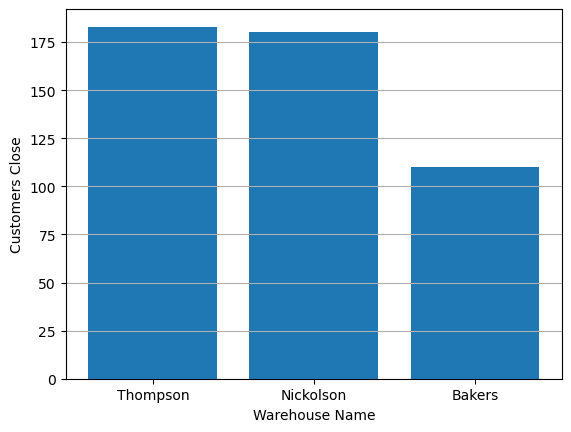

0    Thompson
Name: nearest_warehouse, dtype: object


In [466]:
plt.axes().yaxis.grid()
plt.bar(df["nearest_warehouse"].unique(), df["nearest_warehouse"].value_counts())
plt.xlabel("Warehouse Name")
plt.ylabel("Customers Close")
plt.show()
print(df["nearest_warehouse"].mode())

What percentage of customers are satisfied with their purchase? Create a visualization.

([<matplotlib.axis.XTick at 0x7558d40f8fb0>,
 [Text(0, 0, 'Dissatisfied'), Text(1, 0, 'Satisfied')])

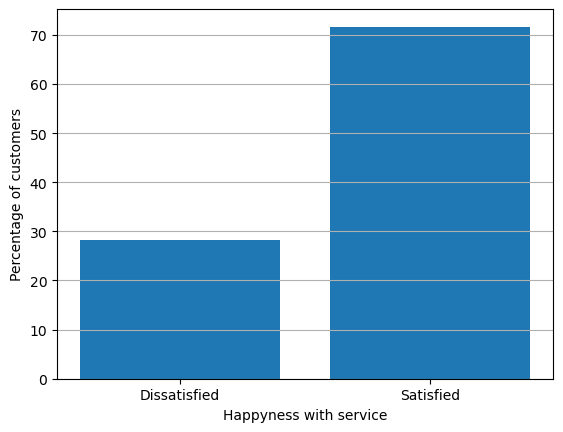

In [467]:
# Total happy customers divided by the total customers times one hundred
percentage = df["is_happy_customer"].sum()/df["is_happy_customer"].__len__() * 100
ax = plt.axes()
ax.yaxis.grid()
plt.ylabel("Percentage of customers")
plt.xlabel("Happyness with service")
plt.bar(df["is_happy_customer"].unique(), df["is_happy_customer"].value_counts()/df["is_happy_customer"].__len__() * 100)
plt.xticks([0, 1], ['Dissatisfied', 'Satisfied'])